In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, beta

In [2]:
R = 1 # radius of a sphere
n_sim = 10000 # number of simulations, should be divisible by n_fol

theta = 2
k = 2
a = 8
b = 0.2

n_fol = 1000 # number of follicules

Simple funtion to draw simulations with fixed R

In [3]:
def sim(R, n_sim):
    # SIMULATIONS
    d = np.random.uniform(low = -R, high = R, size = n_sim) 
    # where d is distance from center of a sphere to the section
    r = np.sqrt(R**2 - d**2) # apparent radius

    # PLOT SIMULATIONS
    counts, bins, _ = plt.hist(r, density = True, alpha = 0.8,
    color = 'brown', label = "simulated", bins = 200) # bins == size
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # ANALYTICAL SOLUTION
    r_set = np.linspace(0, R, 200) # size should equal n of bins in hist
    r_dist =  r_set / (R * np.sqrt(R**2 - r_set**2))

    # BETA FIT
    a, b, loc, scale = beta.fit(r)
    r_dist2 = beta.pdf(r_set, a = a, b = b, loc = loc, scale = scale)

    #COMPUTE MSE
    analytical_interp = np.interp(bin_centers, r_set, r_dist)
    beta_interp = np.interp(bin_centers, r_set, r_dist2)

    mse_analytical = np.mean((counts - analytical_interp) ** 2)
    mse_beta = np.mean((counts - beta_interp) ** 2)

    # PRINT ERRORS
    print(f"MSE (Analytical): {mse_analytical}")
    print(f"MSE (Beta): {mse_beta}")

    # PLOT CUSTOMIZATION
    plt.plot(r_set, r_dist, label = "analytical")
    plt.plot(r_set, r_dist2, label = "beta fit")

    plt.xlabel("Apparent Radius")
    plt.ylabel("Density")
    plt.legend()
    plt.title("Distribution of Apparent Radius")
    
    max_density = np.max(counts) # setting extremum of an axis
    plt.ylim(0, max_density)

    return plt, counts, r_dist, r_dist2

/tmp/ipykernel_12454/3962263064.py:14: RuntimeWarning: divide by zero encountered in divide
  r_dist =  r_set / (R * np.sqrt(R**2 - r_set**2))
/home/grigorii/bees/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


MSE (Analytical): inf
MSE (Beta): 1.175471701885067


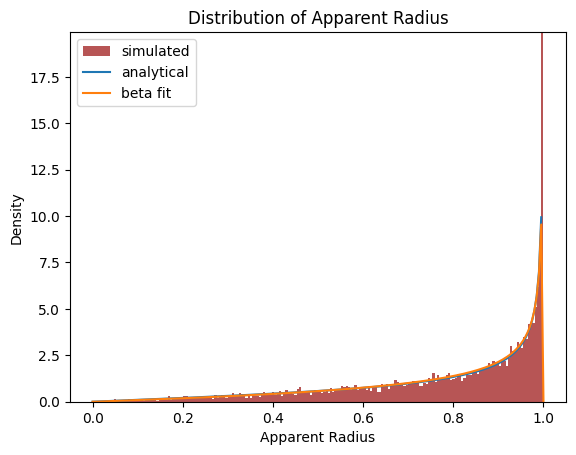

In [4]:
_, counts, r_dist, r_dist2 = sim(R, n_sim)

In [25]:
counts.shape

(200,)

In [31]:
r_dist.shape

(200,)

In [32]:
r_dist2.shape

(200,)

/tmp/ipykernel_6598/2582621103.py:9: RuntimeWarning: divide by zero encountered in divide
  r_dist =  r_set / (R * np.sqrt(R**2 - r_set**2))


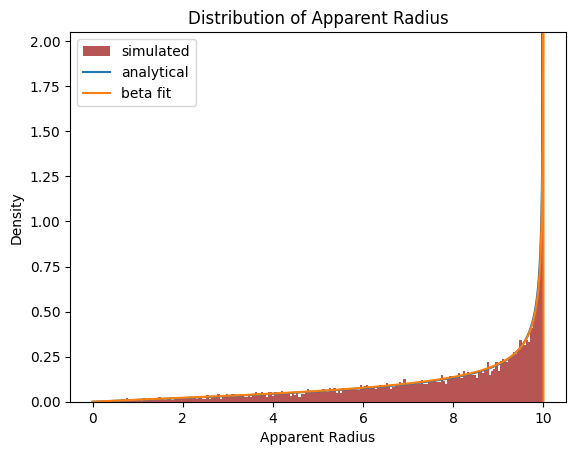

In [19]:
plt, _ = sim(R, n_sim)
plt.show()

Function to run simulations of R (gamma distribution)

In [9]:
def sim_gamma(theta, k, size = None):
    # SIMULATIONS
    r_big = np.random.gamma(shape = theta, scale = k, 
    size = size)
    plt.hist(r_big, bins = 50, density = True, alpha = 0.8,
    color = "brown")

    # ANALYTICS
    x = np.linspace(0, np.max(r_big), 10)  # generate x values
    x_dist = gamma.pdf(x, a = theta, scale = k)    # compute the PDF

    # VISUALIZATION
    plt.plot(x, x_dist, color = "blue", 
    label = f'Theoretical PDF (θ={theta}, k={k})')

    return plt

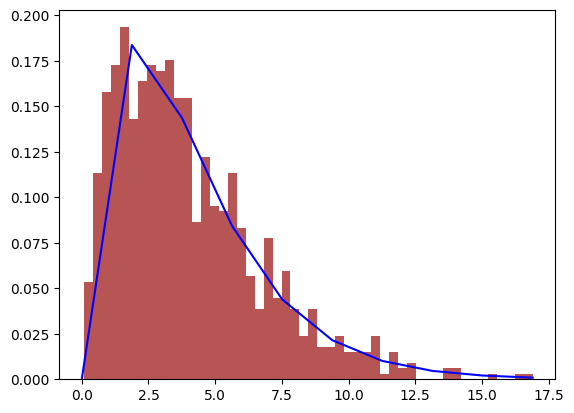

In [10]:
plt = sim_gamma(theta, k, n_fol)
plt.show()

Function to run simulation of r varying of R (gamma)

In [3]:
def sim_var_R(theta, k, n_sim, n_fol):
    """ 
    simulation of 10000 disection's r of 10 follucules with radius R  
    distributed by a gamma law
    """
    r_full = None

    try:
        n_sim = n_sim // n_fol # number of simulation per follicle
    except:
        print("n_sim should be divisible by n_fol") 
        return

    r_big_set = np.random.gamma(shape = theta, scale = k, 
    size = n_fol) # set of follicules' radiuses
    

    for i in range(n_fol):
        # SIMULATIONS
        R = r_big_set[i]
        d = np.random.uniform(low = -R, high = R, size = n_sim) 
        # where d is distance from center of a sphere to the section
        r = np.sqrt(R**2 - d**2) # apparent radius

        if r_full is None:
            r_full = r # initialization of a first row if absent
        else:
            r_full = np.concatenate((r_full, r), axis = 0) # along rows

    # ANALYTICS
    r_grid = np.linspace(0, np.max(r_big_set), 1000)
    analytical_density = np.zeros_like(r_grid)

    for r_big in r_big_set:
        # Only consider r values less than R
        mask = r_grid < r_big
        # Probability density for a single follicle
        p_r = r_grid[mask] / (r_big * np.sqrt(r_big**2 - r_grid[mask]**2))
        analytical_density[mask] += p_r
    
    # Normalize by number of follicles
    analytical_density /= n_fol

    # VISUALIZATION
    counts, _ , _ = plt.hist(r_full, density = True, alpha = 0.8,
    color = 'brown', label = "simulated", bins = 200)

    plt.plot(r_grid, analytical_density, label = "analytical")

    # PLOT CUSTOMIZATION
    plt.xlabel("Apparent Radius")
    plt.ylabel("Density")
    plt.legend()
    plt.title("Distribution of Apparent Radius")

    max_density = np.max(counts) # setting extremum of an axis
    plt.ylim(0, max_density)

    return plt

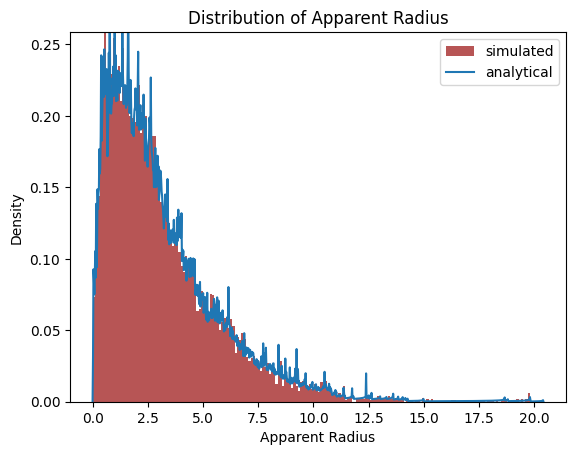

In [4]:
plt = sim_var_R(theta, k, n_sim, n_fol)
plt.show()

In [5]:
k_set = [0.5, 1, 1.5]
theta_set = [1, 2, 3]

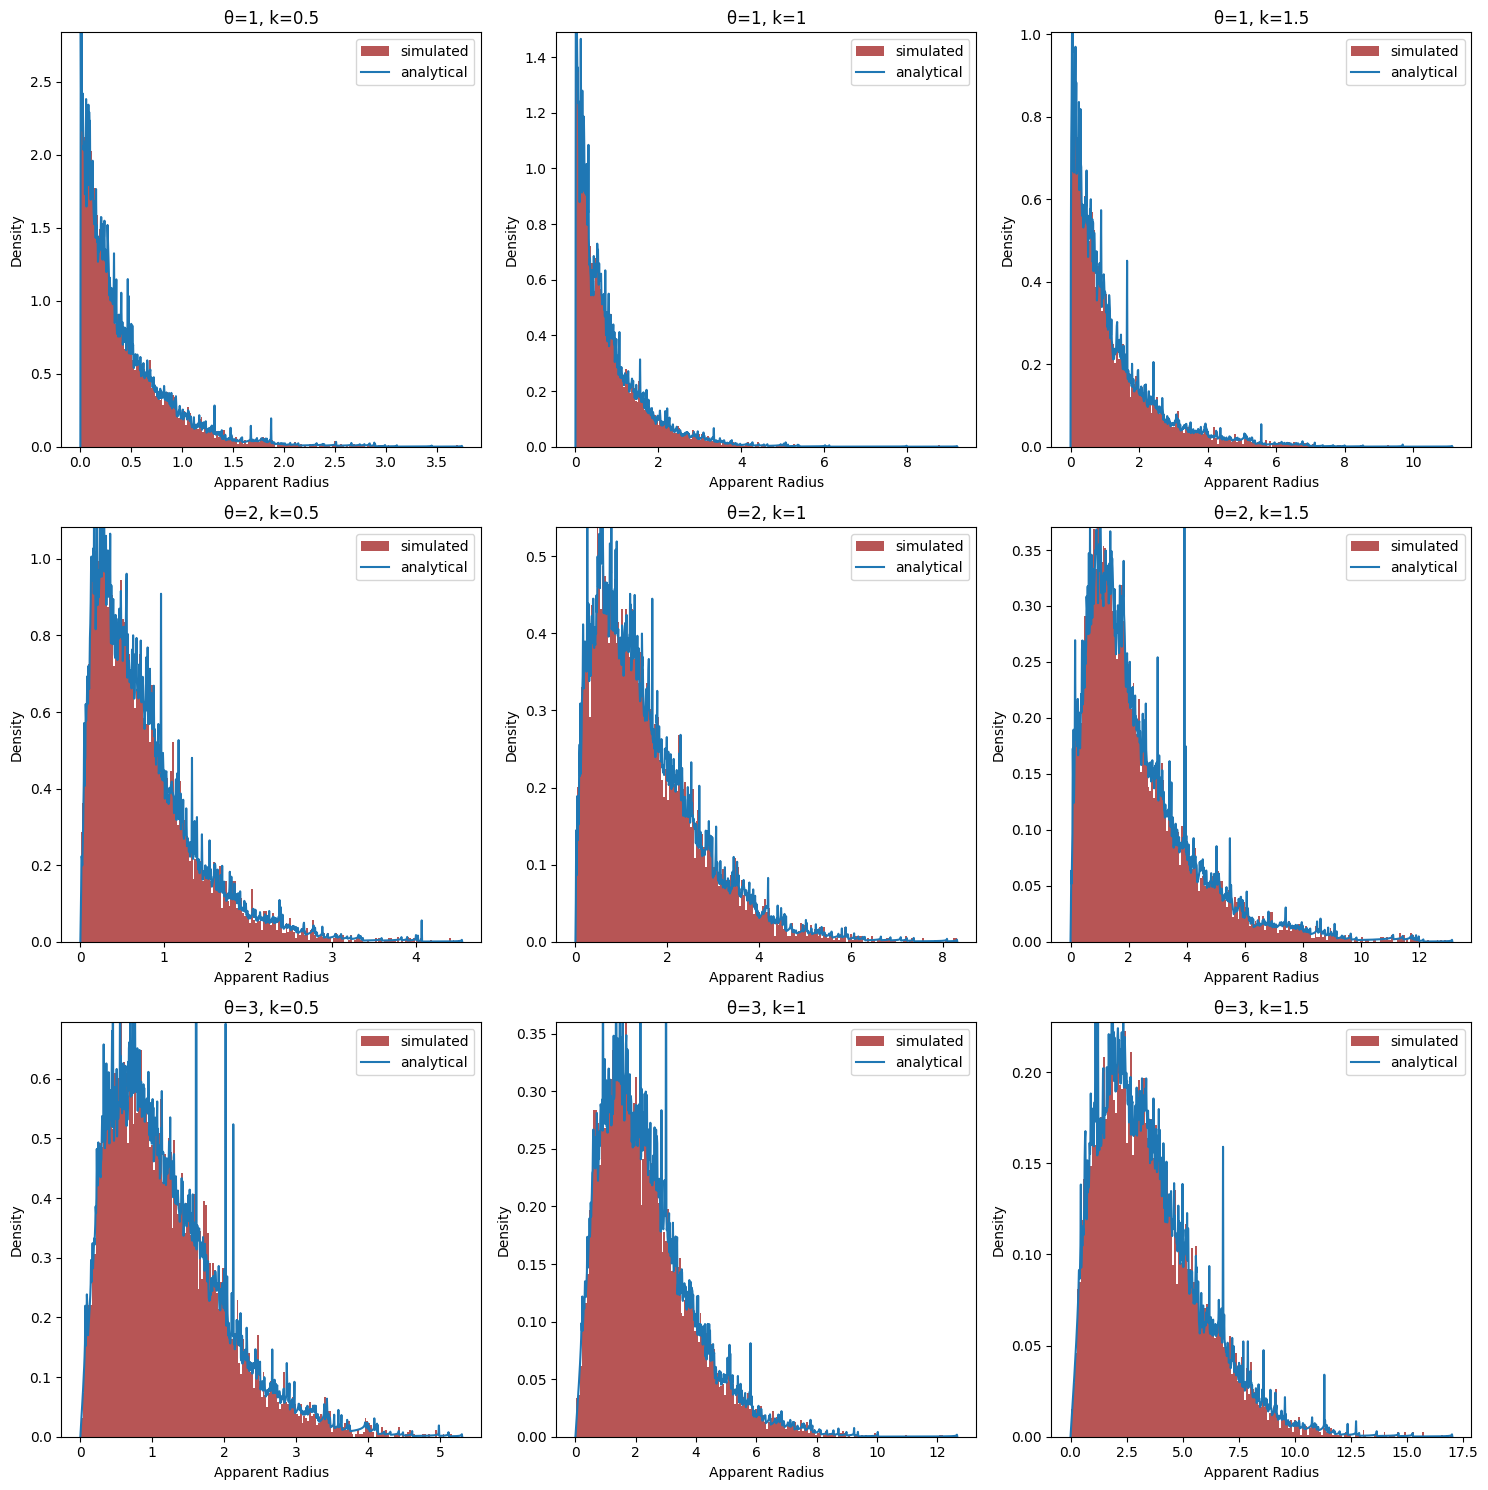

In [6]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
for i, theta in enumerate(theta_set):
    for j, k in enumerate(k_set):
        ax = axes[i, j]
        plt.sca(ax) # set current axis
        plt = sim_var_R(theta, k, n_sim, n_fol)
        plt.title(f"θ={theta}, k={k}")

plt.tight_layout()
plt.show()